In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [4]:
 len(train_data)

8982

In [5]:
len(test_data)

2246

Each example is a list of integers (word indices):

In [6]:
 train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
import numpy as np

### Encoding the data

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels.

In [12]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

Let’s set apart 1,000 samples in the training data to use as a validation set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.7635 - accuracy: 0.4618 - val_loss: 1.8164 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4779 - accuracy: 0.7093 - val_loss: 1.3440 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.0892 - accuracy: 0.7699 - val_loss: 1.1786 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8529 - accuracy: 0.8239 - val_loss: 1.0670 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6787 - accuracy: 0.8636 - val_loss: 0.9908 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5432 - accuracy: 0.8896 - val_loss: 0.9549 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.4365 - accuracy: 0.9126 - val_loss: 0.9256 - val_accuracy: 0.8170
Epoch 8/20
16

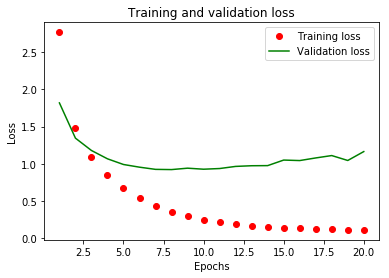

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [19]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 36ms/step - loss: 2.6587 - accuracy: 0.5168 - val_loss: 1.7397 - val_accuracy: 0.6330
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.4225 - accuracy: 0.6997 - val_loss: 1.3320 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 1.0601 - accuracy: 0.7725 - val_loss: 1.1559 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 0s 24ms/step - loss: 0.8416 - accuracy: 0.8201 - val_loss: 1.0720 - val_accuracy: 0.7730
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.6746 - accuracy: 0.8577 - val_loss: 1.0543 - val_accuracy: 0.7680
Epoch 6/9
16/16 [==============================] - 0s 25ms/step - loss: 0.5376 - accuracy: 0.8861 - val_loss: 0.9541 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.4341 - accuracy: 0.9107 - val_loss: 0.9490 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [20]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.7845


In [21]:
predictions = model.predict(x_test)

another
way to encode the labels would be to cast them as
an integer tensor

In [22]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

this approach would change the choice of the loss function. The categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, we should use sparse_categorical_
crossentropy:

In [23]:
model.compile(optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])

A model with an information bottleneck

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 2.8877 - accuracy: 0.3467 - val_loss: 2.3198 - val_accuracy: 0.3680
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 2.0324 - accuracy: 0.3886 - val_loss: 1.8429 - val_accuracy: 0.4040
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.6277 - accuracy: 0.5779 - val_loss: 1.6025 - val_accuracy: 0.6010
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.4308 - accuracy: 0.6198 - val_loss: 1.5293 - val_accuracy: 0.6020
Epoch 5/20
63/63 [==============================] - 1s 13ms/step - loss: 1.3102 - accuracy: 0.6336 - val_loss: 1.4874 - val_accuracy: 0.6190
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2136 - accuracy: 0.6584 - val_loss: 1.4683 - val_accuracy: 0.6190
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1371 - accuracy: 0.6850 - val_loss: 1.4600 - val_accuracy: 0.6370
Epoch 8/20
63

This drop
is mostly due to the fact that we’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. One solution is to add larger layers

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history2 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7093 - accuracy: 0.6424 - val_loss: 1.2015 - val_accuracy: 0.7380
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9187 - accuracy: 0.7985 - val_loss: 1.0399 - val_accuracy: 0.7760
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 0.5987 - accuracy: 0.8707 - val_loss: 0.9052 - val_accuracy: 0.8100
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 0.3978 - accuracy: 0.9098 - val_loss: 0.8788 - val_accuracy: 0.8130
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 0.2860 - accuracy: 0.9347 - val_loss: 1.0712 - val_accuracy: 0.7760
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 0.2282 - accuracy: 0.9437 - val_loss: 0.9264 - val_accuracy: 0.8270
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.1882 - accuracy: 0.9505 - val_loss: 0.9449 - val_accuracy: 0.8220
Epoch 8/20
63

In [33]:
history2.history['val_accuracy']

[0.7379999756813049,
 0.7760000228881836,
 0.8100000023841858,
 0.8130000233650208,
 0.7760000228881836,
 0.8270000219345093,
 0.8220000267028809,
 0.8029999732971191,
 0.8149999976158142,
 0.8040000200271606,
 0.8090000152587891,
 0.800000011920929,
 0.8040000200271606,
 0.8019999861717224,
 0.7960000038146973,
 0.7919999957084656,
 0.8009999990463257,
 0.8029999732971191,
 0.7839999794960022,
 0.7820000052452087]